<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Меня зовут - Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.

#  Описание задачи

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Шаг 1. Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

calls = pd.read_csv('C:/# Work/Programming/Я.Практикум/4. Статистический анализ данных/Datasets/calls.csv')
internet = pd.read_csv('C:/# Work/Programming/Я.Практикум/4. Статистический анализ данных/Datasets/internet.csv')
messages = pd.read_csv('C:/# Work/Programming/Я.Практикум/4. Статистический анализ данных/Datasets/messages.csv')
tariffs = pd.read_csv('C:/# Work/Programming/Я.Практикум/4. Статистический анализ данных/Datasets/tariffs.csv')
users = pd.read_csv('C:/# Work/Programming/Я.Практикум/4. Статистический анализ данных/Datasets/users.csv')

#### База данных "Calls"

In [2]:
print(calls.head())
print('\n')
print(calls.info())
print('\n')
print(calls.duplicated().sum())

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


0


Вывод:
- Необходимо изменить тип данные в колонке с датой
- Необходимо округлить данные в колонке с длительностью разговора согласно вводным задачи

Визуально остальные данные выглядят корректными

#### База данных "Internet"

In [3]:
print(internet.head())
print('\n')
print(internet.info())
print('\n')
print(internet.duplicated().sum())

   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


0


Вывод:
- Необходимо изменить тип данные в колонке с датой
- Необходимо округлить данные в колонке с длительностью разговора согласно вводным задачи

Визуально остальные данные выглядят корректными

#### База данных "Messages"

In [4]:
print(messages.head())
print('\n')
print(messages.info())
print('\n')
print(messages.duplicated().sum())

       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


0


Вывод:
- Необходимо изменить тип данные в колонке с датой

Визуально остальные данные выглядят корректными

#### База данных "tariffs"

In [5]:
print(tariffs.head())
print('\n')
print(tariffs.info())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tari

#### База данных "Users"

In [6]:
print(users.head())
print('\n')
print(users.info())
print('\n')
print(users.duplicated().sum())

   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   

Вывод:
- Необходимо изменить тип данные в колонке с датой

Визуально остальные данные выглядят корректными

### Шаг 2. Предобработка  и  подготовка к анализу данных

Вносим изменения согласно комментариям выше

In [7]:
def date_type_correction(data_list):
    for data in data_list:
        for column in data.columns:
            if 'date' in column and column !='churn_date':
                    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')

date_type_correction([calls, internet, users, messages])

calls['duration'] = calls['duration'].apply(np.ceil)
internet['counted_mb'] = internet['mb_used'].apply(np.ceil)

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошее округление.

Убираем нулевые значения из округленных данных, т.к. не участвуют в расчетах и могут исказить графики.
Данные значения могли быть вызваны:
 - Интернет: отсутствие использования интернета
 - Звонки: принимающая сторона не поднимает трубку или абонент занят.

In [13]:
calls.drop(calls[calls['duration'] == 0].index, inplace=True)
calls = calls.reset_index(drop=True)

internet.drop(internet[internet['mb_used'] == 0].index, inplace=True)
internet = internet.reset_index(drop=True)

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Возмлжный вариант обработки 0.

Добавляем колонку с обозначением месяца

In [14]:
def month(data_list):
    for data in data_list:
        for column in data.columns:
            if 'date' in column and column !='churn_date':
                    data['month'] = pd.DatetimeIndex(data[column]).month 

month([calls, internet, users, messages])

#### Добавляем колонки с требуемыми данными для каждого пользователя:
- количество сделанных звонков по месяцам
- израсходованные минуты по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам

In [15]:
df_counted_calls = calls.groupby(['user_id', 'month'], as_index=False)
df_counted_calls = df_counted_calls.agg({'duration':['count', 'sum']})
df_counted_calls.columns = ['user_id', 'month','calls_quantity', 'minutes_spent']

df_counted_messages = messages.groupby(['user_id','month'], as_index=False)['id'].count()
df_counted_messages.columns = ['user_id', 'month', 'send_messages']

df_counted_internet = internet.groupby(['user_id', 'month'], as_index=False)['mb_used'].sum()
df_counted_internet.columns = ['user_id', 'month', 'traffic']

Объединяем полученные таблицы для совокупного анализа данных

In [30]:
df_users = users.loc[:,['user_id', 'city', 'tariff']]
df_for_merge_1 =  df_counted_calls.merge(df_counted_messages, on=('user_id', 'month'), how='outer')
df_for_merge_2 = df_for_merge_1.merge(df_counted_internet, on=('user_id', 'month'), how='outer')
df = df_for_merge_2.merge(df_users, on='user_id', how='outer')
print(df.head(10))

   user_id  month  calls_quantity  minutes_spent  send_messages   traffic  \
0     1000    5.0            17.0          159.0           22.0   2253.49   
1     1000    6.0            28.0          172.0           60.0  23233.77   
2     1000    7.0            41.0          340.0           75.0  14003.64   
3     1000    8.0            42.0          408.0           81.0  14055.93   
4     1000    9.0            46.0          466.0           57.0  14568.91   
5     1000   10.0            44.0          350.0           73.0  14702.49   
6     1000   11.0            37.0          338.0           58.0  14756.47   
7     1000   12.0            38.0          333.0           70.0   9817.61   
8     1001   11.0            45.0          430.0            NaN  18429.34   
9     1001   12.0            47.0          414.0            NaN  14036.66   

        city tariff  
0  Краснодар  ultra  
1  Краснодар  ultra  
2  Краснодар  ultra  
3  Краснодар  ultra  
4  Краснодар  ultra  
5  Краснодар  ultra 

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Параметры рассчитаны верно.

Сомтрим на полученные итоговые данные

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3216 non-null   int64  
 1   month           3214 non-null   float64
 2   calls_quantity  3168 non-null   float64
 3   minutes_spent   3168 non-null   float64
 4   send_messages   2717 non-null   float64
 5   traffic         3201 non-null   float64
 6   city            3216 non-null   object 
 7   tariff          3216 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 226.1+ KB
None


Отсутвие данных есть во всех ячейках для расчета. 
Наблюдается два индекса, где нет никаких данных по использованию мобильного телеоператора

In [18]:
print(df[(df['calls_quantity'].isnull()) & (df['minutes_spent'].isnull()) & (df['send_messages'].isnull()) & 
        (df['traffic'].isnull())])
print(internet.query('user_id == 1128'))
print(internet.query('user_id == 1371'))

      user_id  month  calls_quantity  minutes_spent  send_messages  traffic  \
3214     1128    NaN             NaN            NaN            NaN      NaN   
3215     1371    NaN             NaN            NaN            NaN      NaN   

          city tariff  
3214  Волжский  ultra  
3215      Омск  smart  
Empty DataFrame
Columns: [Unnamed: 0, id, mb_used, session_date, user_id, counted_mb, month]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, id, mb_used, session_date, user_id, counted_mb, month]
Index: []


Из данных следует, что два пользователя либо не используют никак предоставляемую связь, либо по ним отсутствует выгрузка. Уберем их данные из дальнешйего анализа. По остальным пользователям есть хоть какие-то данные, поэтому предполагаем, что по ним все корректно и отсутствующие значения являются верными. Заменяем их на 0.

In [57]:
df.drop(df[df['user_id'] == 1128].index, inplace=True)
df.drop(df[df['user_id'] == 1371].index, inplace=True)
df = df.reset_index(drop=True)

df = df.fillna(0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              3214 non-null   int64  
 1   month                3214 non-null   float64
 2   calls_quantity       3214 non-null   float64
 3   minutes_spent        3214 non-null   float64
 4   send_messages        3214 non-null   float64
 5   traffic              3214 non-null   float64
 6   city                 3214 non-null   object 
 7   tariff               3214 non-null   object 
 8   monthly_fee          3214 non-null   int64  
 9   budget_sms_excess    3214 non-null   float64
 10  budget_calls_excess  3214 non-null   float64
 11  GB_excess_plan       3214 non-null   float64
 12  total_budget         3214 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 326.5+ KB
None


#### Добавляем данные по выручке пользователей

In [61]:
# Добавляем абонентскую плату на каждого пользователя
def monthly_fee(data):
    if data['tariff'] == 'ultra':
        return 1950
    else:
        return 550

df['monthly_fee'] = df.apply(monthly_fee, axis=1)

#Добавляем сумму переплат за каждую услугу
def minutes_excess_plan(data):
    if data['tariff'] == 'ultra':
        if data['minutes_spent'] - 3000 > 0:
            return (data['minutes_spent'] - 3000)*1
        else:
            return 0
    else:
        if data['minutes_spent'] - 500 > 0:
            return (data['minutes_spent'] - 500)*3
        else:
            return 0

df['budget_calls_excess'] = df.apply(minutes_excess_plan, axis=1)

def sms_excess_plan(data):
    if data['tariff'] == 'ultra':
        if data['send_messages'] - 1000 > 0:
            return (data['send_messages'] - 1000)*1
        else:
            return 0
    else:
        if data['send_messages'] - 50 > 0:
            return (data['send_messages'] - 50)*3
        else:
            return 0

df['budget_sms_excess'] = df.apply(sms_excess_plan, axis=1)

def traffic_excess_plan(data):
    if data['tariff'] == 'ultra':
        if data['traffic'] - 30720 > 0:
            return np.ceil((data['traffic'] - 30720)/1024)*150
        else:
            return 0
    else:
        if data['traffic'] - 15360 > 0:
            return np.ceil((data['traffic'] - 15360)/1024)*200
        else:
            return 0

df['GB_excess_plan'] = df.apply(traffic_excess_plan, axis=1)

# Добавляем итоговую стоимость услуг за месяц
df['total_budget'] = df['GB_excess_plan'] + df['budget_sms_excess'] + df['budget_calls_excess'] + df['monthly_fee']

# Добавляем столбец с бюджетом сверх абонентской платы
df['additional_budget'] = df['total_budget'] - df['monthly_fee']
    

Итоговая таблица:

In [62]:
print(df.head())

   user_id  month  calls_quantity  minutes_spent  send_messages   traffic  \
0     1000    5.0            17.0          159.0           22.0   2253.49   
1     1000    6.0            28.0          172.0           60.0  23233.77   
2     1000    7.0            41.0          340.0           75.0  14003.64   
3     1000    8.0            42.0          408.0           81.0  14055.93   
4     1000    9.0            46.0          466.0           57.0  14568.91   

        city tariff  monthly_fee  budget_sms_excess  budget_calls_excess  \
0  Краснодар  ultra         1950                0.0                  0.0   
1  Краснодар  ultra         1950                0.0                  0.0   
2  Краснодар  ultra         1950                0.0                  0.0   
3  Краснодар  ultra         1950                0.0                  0.0   
4  Краснодар  ultra         1950                0.0                  0.0   

   GB_excess_plan  total_budget  additional_budget  
0             0.0        19

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, выручка рассчитана верно.

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Посмотри использование метода display для вывода таблицы, будет посимпатичнее, чем print.

### Шаг 3. Анализ полученных данных

Для начала избавимся от выбросов через функцию boxplot

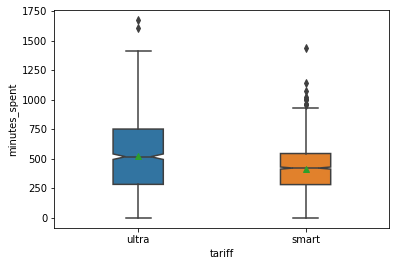

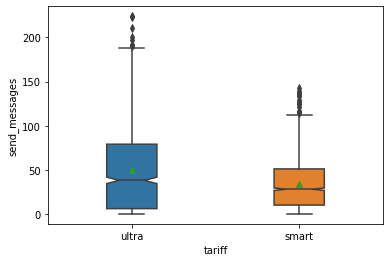

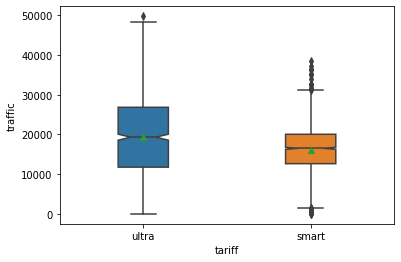

In [102]:
import seaborn as sns
%matplotlib inline

for_boxplot = ['minutes_spent', 'send_messages', 'traffic']

for i in for_boxplot:
    sns.boxplot(x='tariff', y=i, data=df, width=0.3, showmeans=True, notch=True,)
    plt.show()

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Отличные сравнительный боксплоты, хорошо использован цикл.

Находим границы усов для фильтрации 

In [152]:
def quantiles(data, column, tariff):
    q1 = np.percentile(data[data['tariff'] == tariff][column].dropna(), 25)
    q3 = np.percentile(data[data['tariff'] == tariff][column].dropna(), 75)
    IQR = q3 - q1
    
    start = np.ceil(q1 - 1.5 * IQR)
    end = np.ceil(q3 + 1.5 * IQR)
    
    if start < 0:
        start = 0
    
    print('Значения интервала для {} тарифа {}: {} - {}'.format(column, tariff, start, end))
    return '\t'

print(quantiles(df, 'minutes_spent', 'ultra'))
print(quantiles(df, 'minutes_spent', 'smart'))
print(quantiles(df, 'send_messages', 'ultra'))
print(quantiles(df, 'send_messages', 'smart'))
print(quantiles(df, 'traffic', 'ultra'))
print(quantiles(df, 'traffic', 'smart'))

Значения интервала для minutes_spent тарифа ultra: 0 - 1454.0
	
Значения интервала для minutes_spent тарифа smart: 0 - 940.0
	
Значения интервала для send_messages тарифа ultra: 0 - 189.0
	
Значения интервала для send_messages тарифа smart: 0 - 113.0
	
Значения интервала для traffic тарифа ultra: 0 - 49439.0
	
Значения интервала для traffic тарифа smart: 1544.0 - 31143.0
	


Используем интервалы для сокращения выбросов:

In [204]:
df_smart = (df[(df['tariff'] == 'smart') & (df['minutes_spent'] < 941) & (df['send_messages'] < 114) & 
               (df['traffic'] < 31144) & (df['traffic'] > 1543)])
df_ultra = (df[(df['tariff'] == 'ultra') & (df['minutes_spent'] < 1455) & (df['send_messages'] < 190) & 
               (df['traffic'] < 49439)])

##### Строим гистограммы по количеству звонков:

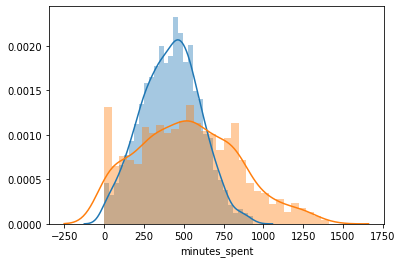

In [216]:
sns.distplot(df_smart['minutes_spent'], bins=30)
sns.distplot(df_ultra['minutes_spent'], bins=30)
plt.show()

In [245]:
def tasks(column, tariff):
    if tariff == 'ultra':
        mean_ultra = round(df_ultra[column].mean(),1)
        variance_ultra = round(df_ultra[column].var(),1)
        std_ultra = round(df_ultra[column].std(),1)
        
        print('Среднее значение {} по тарифу {}: {}'.format(column, tariff, mean_ultra))
        print('Дисперсия {} по тарифу {}: {}'.format(column, tariff, variance_ultra))
        print('Стандартное отклонение {} по тарифу {}: {}'.format(column, tariff, std_ultra))
        return '\t'
    
    else:
        mean_smart = round(df_smart[column].mean(),1)
        variance_smart = round(df_smart[column].var(),1)
        std_smart = round(df_smart[column].std(),1)

        print('Среднее значение {} по тарифу {}: {}'.format(column, tariff, mean_smart))
        print('Дисперсия {} по тарифу {}: {}'.format(column, tariff, variance_smart))
        print('Стандартное отклонение {} по тарифу {}: {}'.format(column, tariff, std_smart))
        return '\t'

print(tasks('minutes_spent', 'smart'))
print(tasks('minutes_spent', 'ultra'))

print('Доля пользователей, которые докупают дополнительно количество минут по тарифу "СМАРТ": {:.2%}'.
      format(df_smart[df_smart['budget_calls_excess'] > 0]['budget_calls_excess'].count() / 
      len(df_smart['budget_calls_excess'])))
print('Доля пользователей, которые докупают дополнительно количество минут по тарифу "УЛЬТРА": {:.2%}'.
      format(df_ultra[df_ultra['budget_calls_excess'] > 0]['budget_calls_excess'].count() / 
      len(df_ultra['budget_calls_excess'])))

Среднее значение minutes_spent по тарифу smart: 417.0
Дисперсия minutes_spent по тарифу smart: 33138.7
Стандартное отклонение minutes_spent по тарифу smart: 182.0
	
Среднее значение minutes_spent по тарифу ultra: 524.9
Дисперсия minutes_spent по тарифу ultra: 97675.5
Стандартное отклонение minutes_spent по тарифу ultra: 312.5
	
Доля пользователей, которые докупают дополнительно количество минут по тарифу "СМАРТ": 33.50%
Доля пользователей, которые докупают дополнительно количество минут по тарифу "УЛЬТРА": 0.00%


Вывод:
Наиболее популярная вилка на тарифе СМАРТ по количеству потраченных минут за месяц: 250-550. При сденем значении в 417 минут. Больше трети пользователей (33.5%) дополнительно покупают минуты. 

По тарифу УЛЬТРА пользователи почти равномерно тратят минуты в интвервале 250 - 800 мин. В среднем - 525 минут.
  В данном случае всем польхователям хватает базового количества минут в пакете.

##### Строим гистограммы по количеству сообщений:

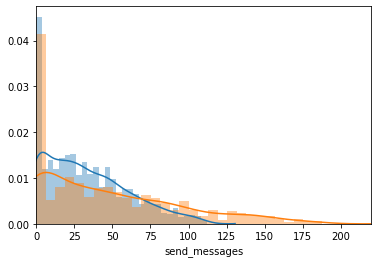

In [281]:
sns.distplot(df_smart['send_messages'], bins=30)
sns.distplot(df_ultra['send_messages'], bins=30)
plt.xlim(0,220)
plt.show()

In [249]:
print(tasks('send_messages', 'smart'))
print(tasks('send_messages', 'ultra'))

print('Доля пользователей, которые докупают дополнительно количество СМС по тарифу "СМАРТ": {:.2%}'.
      format(df_smart[df_smart['budget_sms_excess'] > 0]['budget_sms_excess'].count() / 
      len(df_smart['budget_sms_excess'])))
print('Доля пользователей, которые докупают дополнительно количество СМС по тарифу "УЛЬТРА": {:.2%}'.
      format(df_ultra[df_ultra['budget_sms_excess'] > 0]['budget_sms_excess'].count() / 
      len(df_ultra['budget_sms_excess'])))

Среднее значение send_messages по тарифу smart: 33.1
Дисперсия send_messages по тарифу smart: 741.0
Стандартное отклонение send_messages по тарифу smart: 27.2
	
Среднее значение send_messages по тарифу ultra: 48.1
Дисперсия send_messages по тарифу ultra: 2106.4
Стандартное отклонение send_messages по тарифу ultra: 45.9
	
Доля пользователей, которые докупают дополнительно количество СМС по тарифу "СМАРТ": 25.07%
Доля пользователей, которые докупают дополнительно количество СМС по тарифу "УЛЬТРА": 0.00%


Вывод:
В целом ситуация очень похожа по потреблению между между тарифами, как и в случаем с минутами.
Отдельно стоит отметить, что пользователи значительно меньше отправляют СМС.
В среднем СМАРТ - 30-35 СМС, УЛЬТРА - 50 СМС за месяц

##### Строим гистограммы по интернет трафику:

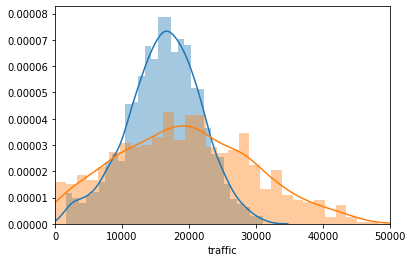

In [280]:
sns.distplot(df_smart['traffic'], bins=30)
sns.distplot(df_ultra['traffic'], bins=30)
plt.xlim(0,50000)
plt.show()

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Классные сравнительные гистограммы.

In [257]:
print(tasks('traffic', 'smart'))
print(tasks('traffic', 'ultra'))

print('Доля пользователей, которые докупают дополнительно количество трафика по тарифу "СМАРТ": {:.2%}'.
      format(df_smart[df_smart['GB_excess_plan'] > 0]['GB_excess_plan'].count() / 
      len(df_smart['GB_excess_plan'])))
print('Доля пользователей, которые докупают дополнительно количество трафика по тарифу "УЛЬТРА": {:.2%}'.
      format(df_ultra[df_ultra['GB_excess_plan'] > 0]['GB_excess_plan'].count() / 
      len(df_ultra['GB_excess_plan'])))

Среднее значение traffic по тарифу smart: 16228.8
Дисперсия traffic по тарифу smart: 30324711.0
Стандартное отклонение traffic по тарифу smart: 5506.8
	
Среднее значение traffic по тарифу ultra: 19379.5
Дисперсия traffic по тарифу ultra: 100187294.6
Стандартное отклонение traffic по тарифу ultra: 10009.4
	
Доля пользователей, которые докупают дополнительно количество трафика по тарифу "СМАРТ": 58.62%
Доля пользователей, которые докупают дополнительно количество трафика по тарифу "УЛЬТРА": 13.24%


Вывод:
По данному параметру мы видим меньшее отставание. В большинстве случаев пользователям на тарифе "СМАРТ" необходимо 13Гб - 20Гб трафика (среднее 16.2Гб). "УЛЬТРА" - 10Гб...30Гб (среднее - 19Гб).
При этом почти 60% пользователей тарифа "СМАРТ" докупают объем. Впервые отмечается, что и пользователям "УЛЬТРА" не хватает объема. Интернет трафик пользуется высоким спросом

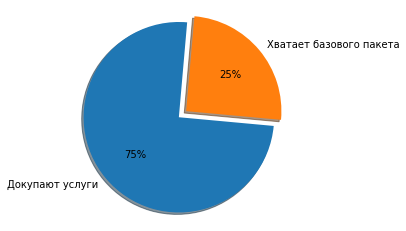

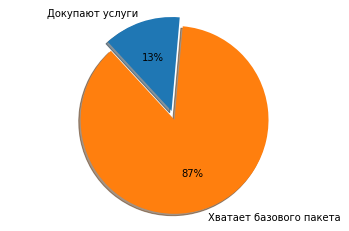

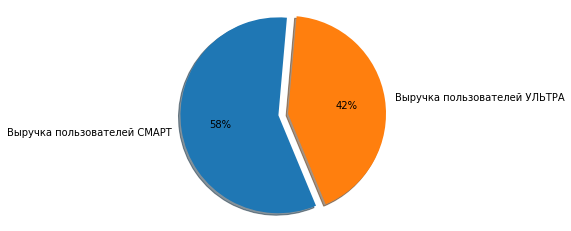

In [318]:
additional_smart = df_smart[df_smart['additional_budget'] > 0]['additional_budget'].count() / len(df_smart['total_budget'])
total_smart = 1 - additional_smart
additional_ultra = df_ultra[df_ultra['additional_budget'] > 0]['additional_budget'].count() / len(df_ultra['total_budget'])
total_ultra = 1 - additional_ultra
smart_budget = df_smart['total_budget'].sum() / (df_smart['total_budget'].sum() + df_ultra['total_budget'].sum())
ultra_budget = 1 - smart_budget

labels = 'Докупают услуги', 'Хватает базового пакета'
sizes = [additional_smart, total_smart]
explode = (0, 0.1)
plt.title = ('Пользователи тарифа СМАРТ')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=85)
ax1.axis('equal')
plt.show()

labels = 'Докупают услуги', 'Хватает базового пакета'
sizes = [additional_ultra, total_ultra]
explode = (0, 0.1)
plt.title = 'Пользователи тарифа УЛЬТРА'

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=85)
ax1.axis('equal')
plt.show()
                                                   
labels = 'Выручка пользователей СМАРТ', 'Выручка пользователей УЛЬТРА'
sizes = [smart_budget, ultra_budget]
explode = (0, 0.1)
plt.title = ('ДОля выручки по тарифам')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=85)
ax1.axis('equal')
plt.show()

Общее количество докупаемых услуг. У пользователей "УЛЬТРА" формируется за счет интернет пакета, пользователи "СМАРТ" - большая доля приходится на интернет. 3/4 не хватает базовых возможностей.

В целом можно также отметить, что несмотря на небольшую долю в общем количестве абонентов пользователей тарифа УЛЬТРА (~30%) их выручка в общем "пироге" ~42%.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, отличный анализ.

### Шаг 4. Проверка гипотез

<span style="color:green"> Обновление </span>

Ставим нулевую гипотезу: средняя выручка пользователей тарифа "СМАРТ" равна средней выручке тарифа "УЛЬТРА"

Альтернативная гипотеза: редняя выручка пользователей тарифа "СМАРТ" не равна средней выручке тарифа "УЛЬТРА"

Удаляем выбросы из данных по стоимости:

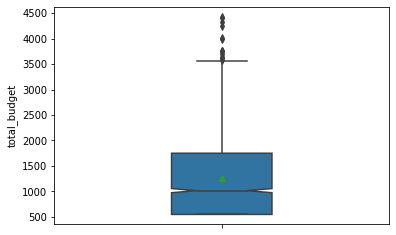

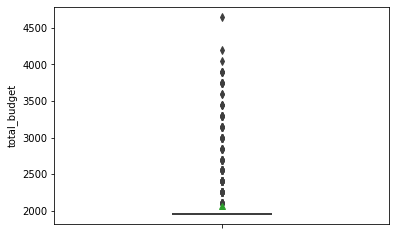

Значения интервала для total_budget тарифа ultra: 1950.0 - 1950.0
	
Значения интервала для total_budget тарифа smart: 0 - 3550.0
	


In [293]:
sns.boxplot(x='total_budget', orient = 'v', data=df_smart, width=0.3, showmeans=True, notch=True)
plt.show()
sns.boxplot(x='total_budget', orient = 'v', data=df_ultra, width=0.3, showmeans=True, notch=True)
plt.show()

print(quantiles(df, 'total_budget', 'ultra'))
print(quantiles(df, 'total_budget', 'smart'))



In [343]:
df_smart_budget = df_smart[df['total_budget'] < 3551]
df_ultra_budget = df_ultra[df['total_budget'] == 1950]

C:\Users\Xiaomi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Xiaomi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


    Выборки у нас незавсимимые, поэтмоу используем метод scipy.stats.ttest_ind:

In [344]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(df_smart_budget['total_budget'], df_ultra_budget['total_budget'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Средняя выручка тарифа "СМАРТ" - {}'.format(round(df_smart_budget['total_budget'].mean(),0)))
print('Средняя выручка тарифа "УЛЬТРА" - {}'.format(round(df_ultra_budget['total_budget'].mean(),0)))

p-значение: 7.33860039185133e-156
Отвергаем нулевую гипотезу
Средняя выручка тарифа "СМАРТ" - 1246.0
Средняя выручка тарифа "УЛЬТРА" - 1950.0


Вывод:
Нулевая гипотеза отвергнута, верной является альтернативная гипотеза.
Несмотря на покупку дополнительных пакетов пользователями тарифа "СМАРТ" абонентская плата слишком значительно, чтобы догнать пользователей "УЛЬТРА" по выручке

<span style="color:green"> Обновление </span>
    
#### Проверка нулевой гипотезы: 
средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

#### Альтернативная гипотеза: 
средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов
    

<div style="border:solid red 2px; padding: 20px"> <h1 style="color: red; margin-bottom:20px">Комментарий наставника</h1>

Нулевая и альтернативные гипот езы сформулированы не верно. Посмотри, какой должнва быть гипотеза для ttest.
    
<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, теперь верно.

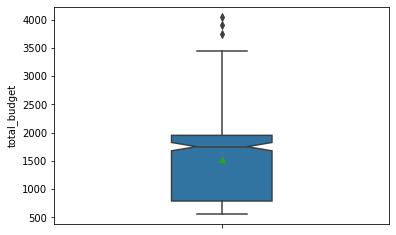

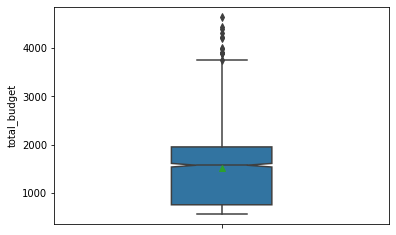

Значения интервала для total_budget: 0 - 3694.0
	
Значения интервала для total_budget: 0 - 3750.0
	


In [351]:
# Формируем датасет
df_cities = df_smart.merge(df_ultra, on=('user_id', 'total_budget', 'city'), how='outer')
df_moscow = df_cities.query('city == "Москва"')
df_regional = df_cities.query('city != "Москва"')

sns.boxplot(x='total_budget', orient = 'v', data=df_moscow, width=0.3, showmeans=True, notch=True)
plt.show()
sns.boxplot(x='total_budget', orient = 'v', data=df_regional, width=0.3, showmeans=True, notch=True)
plt.show()

# Находим выбросы и удаляем
def cities_quantiles(data, column):
    q1 = np.percentile(data[column].dropna(), 25)
    q3 = np.percentile(data[column].dropna(), 75)
    IQR = q3 - q1
    
    start = np.ceil(q1 - 1.5 * IQR)
    end = np.ceil(q3 + 1.5 * IQR)
    
    if start < 0:
        start = 0
    
    print('Значения интервала для {}: {} - {}'.format(column, start, end))
    return '\t'

print(cities_quantiles(df_moscow, 'total_budget'))
print(cities_quantiles(df_regional, 'total_budget'))

df_moscow = df_moscow.query('total_budget < 3695')
df_regional = df_regional.query('total_budget < 3750')

Расчет p-value.
Выборки у нас незавсимимые, поэтмоу используем метод scipy.stats.ttest_ind:

In [370]:
alpha = 0.05

results = st.ttest_ind(df_moscow['total_budget'], df_regional['total_budget'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Средняя выручка по г.Москва - {}'.format(round(df_moscow['total_budget'].mean(),0)))
print('Средняя выручка по регионам - {}'.format(round(df_regional['total_budget'].mean(),0)))

p-значение: 0.1891130767063284
Не получилось отвергнуть нулевую гипотезу
Средняя выручка по г.Москва - 1525.0
Средняя выручка по регионам - 1482.0


Вывод:
Значения находятся в погрешности друг от друга

### Шаг 5. Общий вывод

В ходе анализа результаты показали, что:
- В большинстве случаев пользователям "СМАРТ" не хватает доступного объема в рамках месячного абонемента и им приходится докупать услуги в 75%. Особенно это отрадается на интернете. Рекомендовано подумать над расширением пакета (~2Гб дополнительного Интернета) или созданием промежуточного пакета между "СМАРТ" / "УЛЬТРА". Если учесть значительную долю перепалат по услугам, то денежные средства и желания заполучить дополнительные услуги у пользователей есть.
- Несмотря на значительные объемы инвентаря пользователям тарифа "УЛЬТРА" также в 13% случаев не хватает интернета для месячных нужнд.
- При 30% пользователей  "УЛЬТРА"  тариф генерирует 42% выручки.
- Разницы в выручке между Москвой и регионами нет

<span style="color:green"> Обновление </span>

Большую выручку приносит доход "СМАРТ" по причине дешевизны тарифа и большей доли пользователей. Но несмотря на это отметим 40% выручки от тарифа "УЛЬТРА", который приносит меньшая доля аудитории. И считаем тарифа "УЛЬТРА" больее перспективный для продвижения и дальнейшей рекламной кампании. 

Также стоит подумать о добавлении в линейку промежуточного тарифа, который позволит перевести значительную часть аудитории с тарифа "СМАРТ", при этом сохранив выручку для компании


<div style="border:solid red 2px; padding: 20px"> <h1 style="color: red; margin-bottom:20px">Комментарий наставника</h1>

В выводах нужно написать итоговые рекомендации, какой тариф приносит больше дохода? какой тариф стоит рекламировать?.
    
<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Ок.